# This notebook test various segmentation methods 

In [1]:
from codes.python import load_database,ECG_denoising
from codes.python import heartbeat_segmentation as shs
import numpy as np
from scipy.signal import resample
import operator
from numpy import array
import sys
import csv
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from itertools import chain


In [2]:
mitdb = load_database.load_mitdb()


C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/100
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/101
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/101.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/101.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/101pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/102
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/102.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/102.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/102pt

C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/201.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/201pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/202
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/202.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/202.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/202pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/203
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/203.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/203.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/203pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/205
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/205

In [3]:
mit100 = load_database.load_patient_record("mitdb","100")
mit1_10000 = mit100.MLII[0:300]

C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/100
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv


This cell test the complicated xqrs alogrithm for detecting QRS complex from WFDB. It detects the QRS complex then splits out the index of the R-peak

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


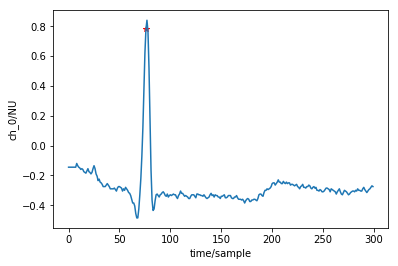

1

In [4]:
qrs_inds  = processing.xqrs_detect(sig=mit1_10000, fs=mit100.fields['fs'])

wfdb.plot_items(signal=mit1_10000, ann_samp=[qrs_inds])

len(qrs_inds)

The results from mitdb record 100: from 0 to 10000 sample, shows quite accurate indicator of R peaks

The next cells show results for simple segmentation algorithm. It looks for the maximum values from a range  that included the annotated r-peaks and it boundaries.

In [5]:
filter_ecg = ECG_denoising.ECG_FIR_filter()
filtered_MLII_10000 = ECG_denoising.denoising_signal_FIR(mit1_10000,filter_ecg)
#mit100.filtered_V1 = ECG_denoising.denoising_signal_FIR(mit100.V1,filter_ecg)
segmented_beat_1,time, segmented_class_ID, segmented_beat_class, segmented_R_pos  = shs.segment_beat_from_annotation(filtered_MLII_10000,mit100.time[0:10000], mit100.annotations, 90, 90)
#original_r_pos = np.array(segmented_original_R)
r_pos = np.array(segmented_R_pos)

wfdb.plot_items(signal=mit1_10000, ann_samp=[r_pos])
#wfdb.plot_items(signal=mit1_10000, ann_samp=[original_r_pos])




ValueError: too many values to unpack (expected 5)

The graphs show that the simple algorithm result from 0 to 10000 sample in record 100 is quite accurate

The next cells test the gqrs algorithm from WFDB

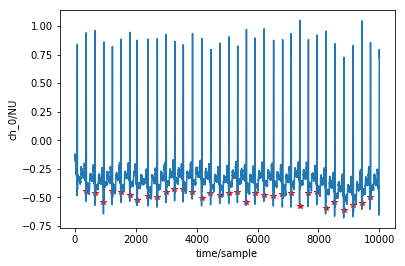

33

In [6]:
qrs_locs = processing.gqrs_detect(mit1_10000, fs=360)


wfdb.plot_items(signal=mit1_10000, ann_samp=[qrs_locs])
len(qrs_locs)


the results of gqrs algorithm looks for peaks from the bottom of the qrs complex which is quite weird.

In [8]:
patients = mitdb.patient_records

In [9]:
count = 0
qrs_r = []

for i in patients:
    qrs_inds = processing.xqrs_detect(sig=i.MLII, fs=i.fields['fs'])
    qrs_r.append(qrs_inds)






Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learn

In [9]:
qrs_r[0][1]
patients[0].time[370] - patients[0].time[375]


-0.014000000000000012

In [10]:
print(patients[1])
all_diffs = []
count = 0
max_diff = 0
pat_in = 0
diff_in = 0
rr_index = 0
for i in qrs_r:
    diffs = []
    for j in range(0,len(i)-1):
        first_ind=i[j+1]
        second_ind =i[j]
        
        diff=round((patients[count].time[first_ind] - patients[count].time[second_ind]),2)
        if(max_diff < diff):
            max_diff = diff
            pat_in = count
            diff_in = j
            rr_index = i[j]
        diffs.append(diff)
    all_diffs.append(diffs)
    count =+ 1



In [11]:
all_diffs_np = np.array(all_diffs)
all_diffs_np.shape

(48,)

In [12]:
averages = []
for a in all_diffs:
    a_sum = sum(a)
    average = round((a_sum/len(a)),2)
    averages.append(average)

### Min and Max average RR interval 

In [13]:
print("max rr interval", max(averages))
print("min rr interval",min(averages))

max rr interval 1.19
min rr interval 0.54


### RR interval distribution for the person with the highest average RR interval

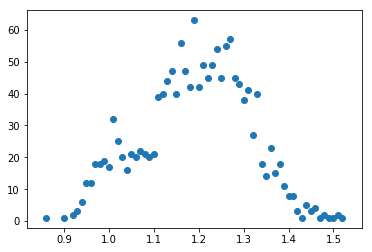

In [14]:
averages.index(max(averages))

mit123 = mitdb.patient_records[21]

diff123 = all_diffs[21]
x ,y  = np.unique(diff123, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)


### RR interval distribution for the person with the lowest average RR interval

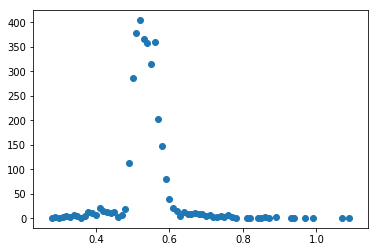

In [15]:
min_average=averages.index(min(averages))
min_record = mitdb.patient_records[min_average]

min_record_diff = all_diffs[min_average]
x ,y  = np.unique(min_record_diff, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)

### Distribution of the RR interval in MITDB and checking out the record for the person with highest rr interval of 19.45 second

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


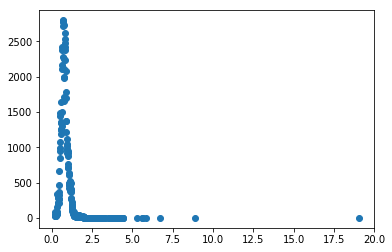

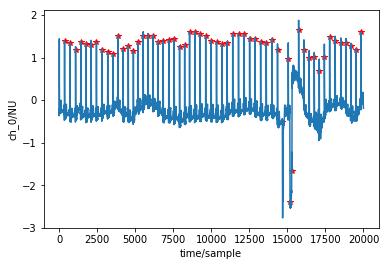

112445
312.347


In [16]:
#flatten_diffs=np.array(all_diffs_np.ravel())
#flatten_diffs

one_d_diffs = list(chain.from_iterable(all_diffs))

x ,y  = np.unique(one_d_diffs, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)

max(one_d_diffs)


one_d_diffs.index(max(one_d_diffs))

mit101 = mitdb.patient_records[pat_in]

qrs_inds = processing.xqrs_detect(sig=mit101.MLII[100000:120000], fs=mit101.fields['fs'])
wfdb.plot_items(signal=mit101.MLII[100000:120000],ann_samp = [qrs_inds]  )

print(rr_index)
print(mit101.time[rr_index])

In [17]:
312.347/60

5.205783333333333

### closer look at RR interval in the range of most common RR-interval

In [18]:
one_d_diffs.sort()

In [19]:
less_diffs = []
for i in range(0, len(one_d_diffs)):
    if(one_d_diffs[i] > 3 ):
        break
    less_diffs.append(one_d_diffs[i])

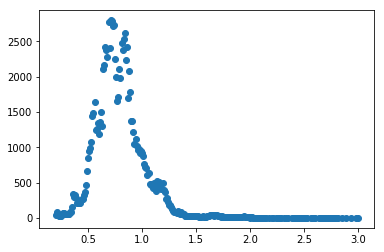

In [20]:
x ,y  = np.unique(less_diffs, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)



### Looking at the sample size different in RR-interval

In [21]:
all_diffs = []

for i in qrs_r:
    diffs = []
    for j in range(0,len(i)-1):
        first_ind=i[j+1]
        second_ind =i[j]
        
        diff=first_ind - second_ind
        
        diffs.append(diff)
    all_diffs.append(diffs)
    
one_d_diffs = list(chain.from_iterable(all_diffs))

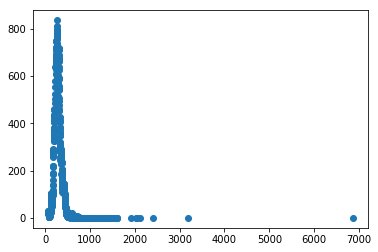

In [22]:
x ,y  = np.unique(one_d_diffs, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)

In [23]:
one_d_diffs.sort()

In [24]:
less_diffs = []
for i in range(0, len(one_d_diffs)):
    if(one_d_diffs[i] > 600 ):
        break
    less_diffs.append(one_d_diffs[i])

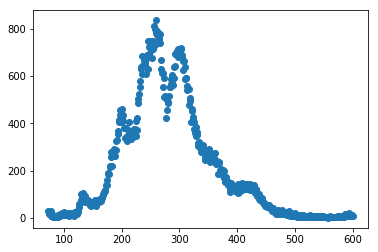

In [25]:
x ,y  = np.unique(less_diffs, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)

In [26]:
min(less_diffs)

73